In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import utils
np.random.seed(0)

# The dataset

In [2]:
data = pd.read_csv('Admission_Predict.csv', index_col=0)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [3]:
data['Admitted'] = data['Chance of Admit'] >= 0.75

In [4]:
data = data.drop(['Chance of Admit'], axis=1)

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,True
397,325,107,3,3.0,3.5,9.11,1,True
398,330,116,4,5.0,4.5,9.45,1,True


In [6]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

In [7]:
features

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [8]:
labels

Serial No.
1       True
2       True
3      False
4       True
5      False
       ...  
396     True
397     True
398     True
399    False
400     True
Name: Admitted, Length: 400, dtype: bool

# Training a decision tree

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(features, labels)

DecisionTreeClassifier()

In [11]:
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

In [12]:
dt.score(features, labels)

1.0

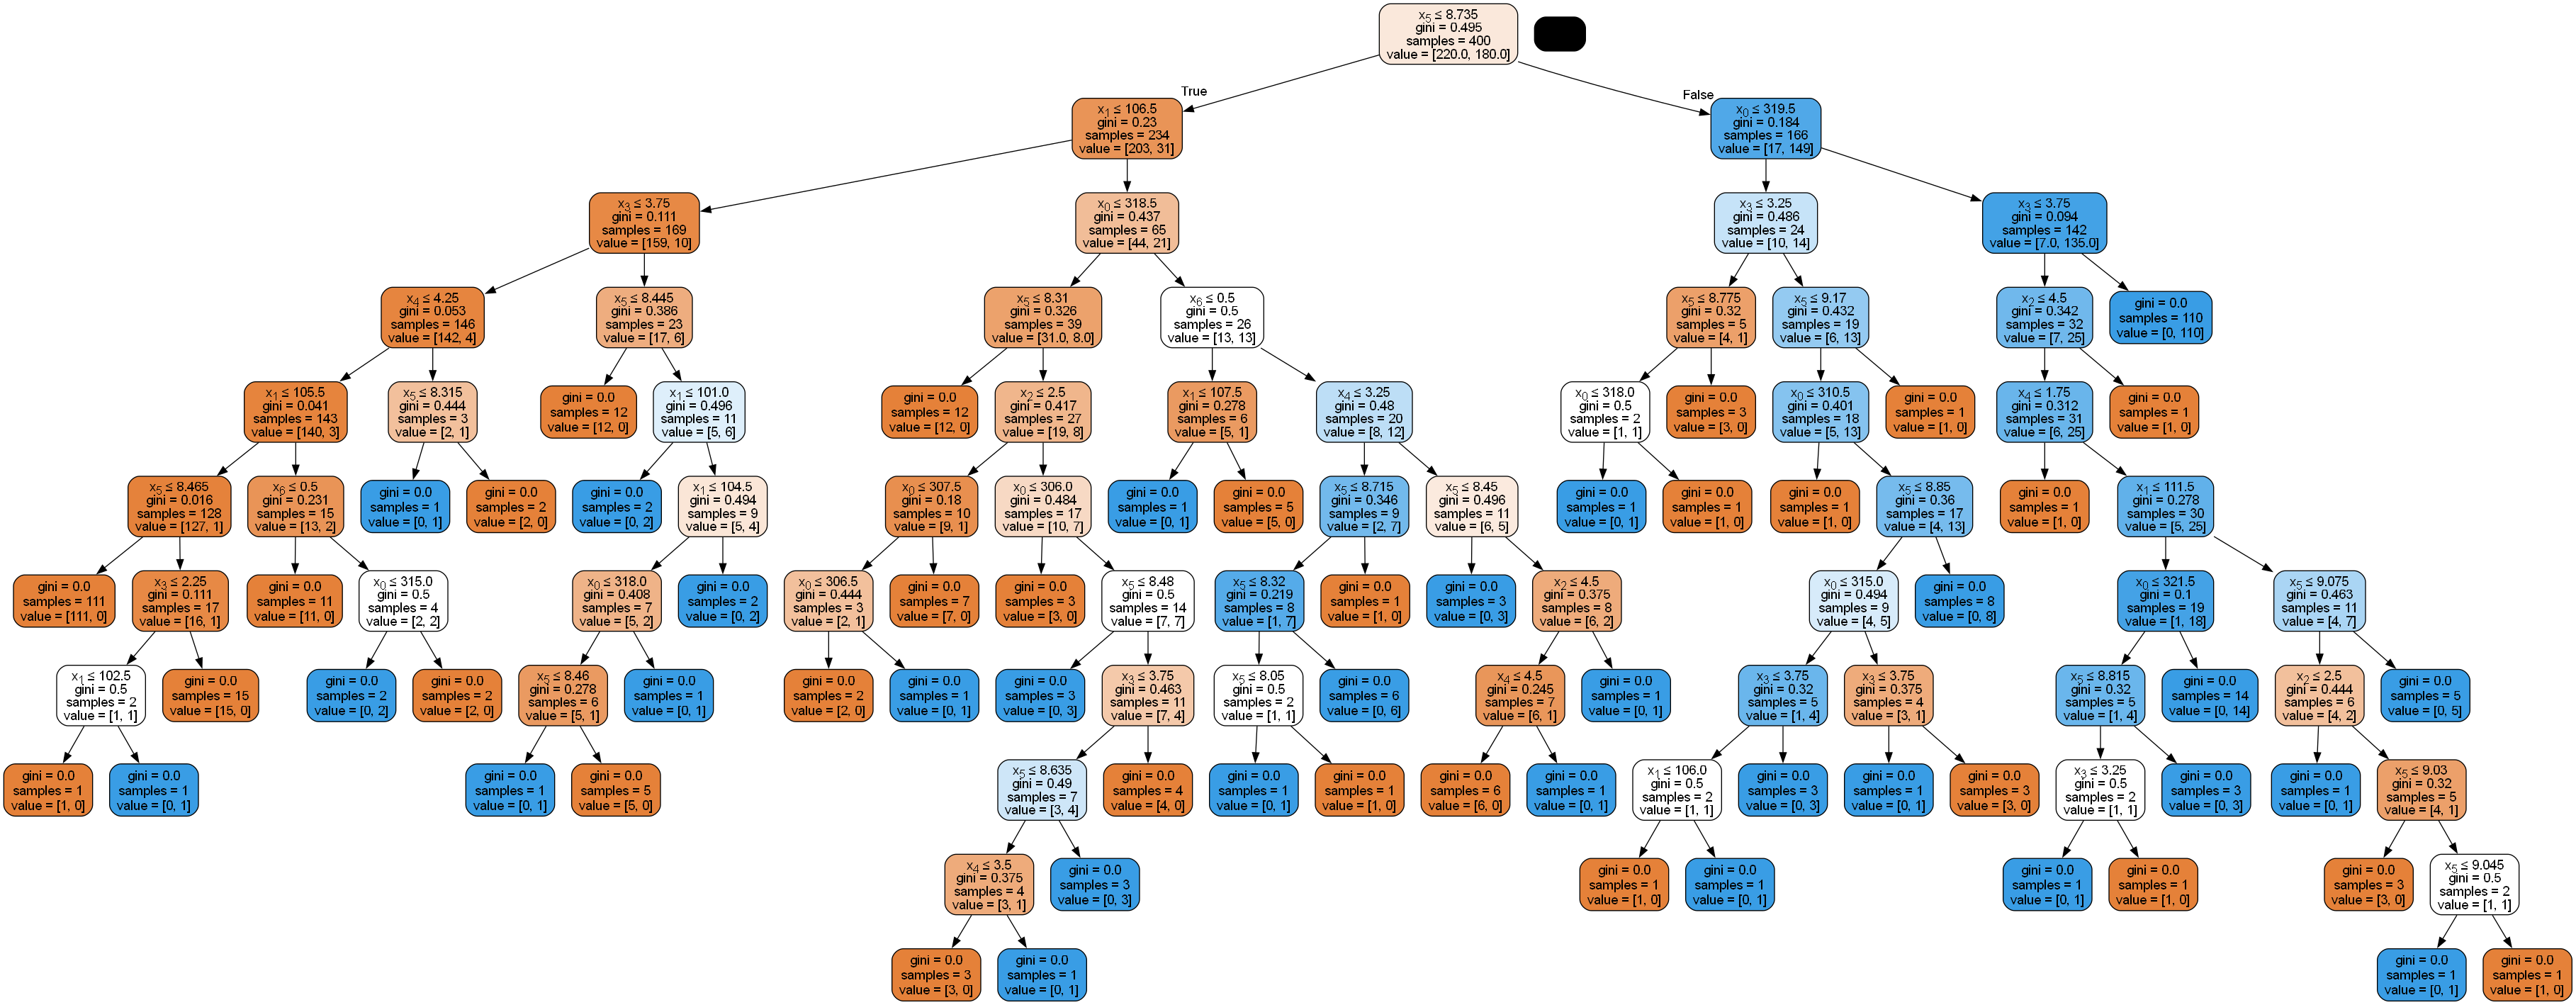

In [13]:
utils.display_tree(dt)

# Training a smaller tree that doesn't overfit

In [14]:
dt_smaller = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [15]:
dt_smaller.fit(features, labels)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [16]:
dt_smaller.score(features, labels)

0.885

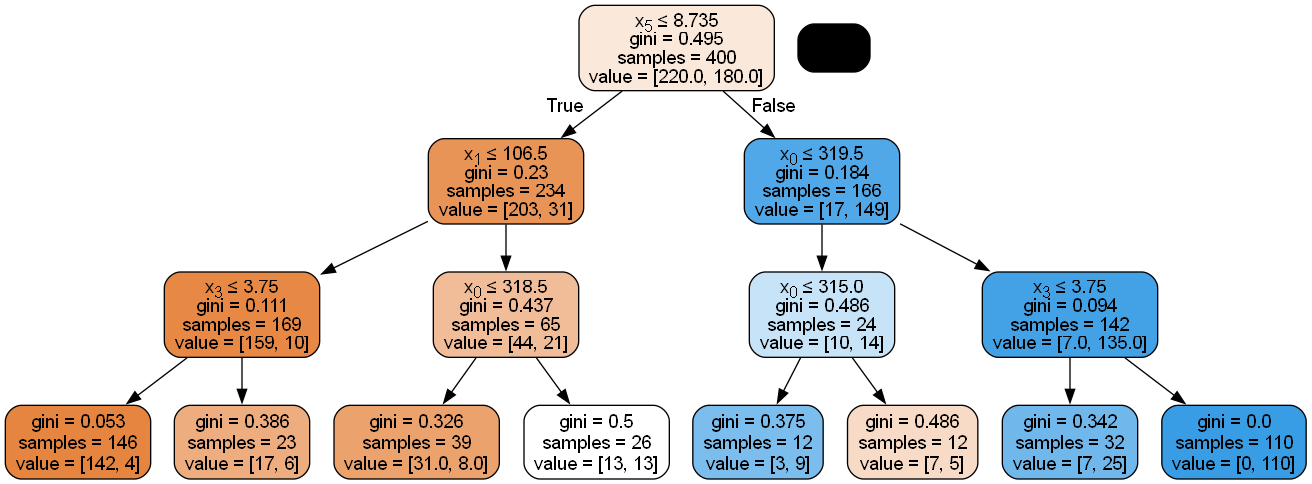

In [17]:
utils.display_tree(dt_smaller)

### Using the tree to make predictions

In [18]:
dt_smaller.predict([[320,
                     110,
                     3,
                     4.0,
                     3.5,
                     8.9,
                     0]])

c:\Users\maskf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [19]:
# A node in the white (neutral) leaf gets a false prediction
dt_smaller.predict([[320,
                     110,
                     3,
                     4.0,
                     3.5,
                     8.0,
                     0]])

c:\Users\maskf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False])

# Training a decision tree with only two features

In [20]:
#exams = data[['GRE Score', 'CGPA']]
exams = data[['GRE Score', 'TOEFL Score']]
exams

,GRE Score,TOEFL Score
Serial No.,,
1,337,118
2,324,107
3,316,104
4,322,110
5,314,103
...,...,...
396,324,110
397,325,107
398,330,116


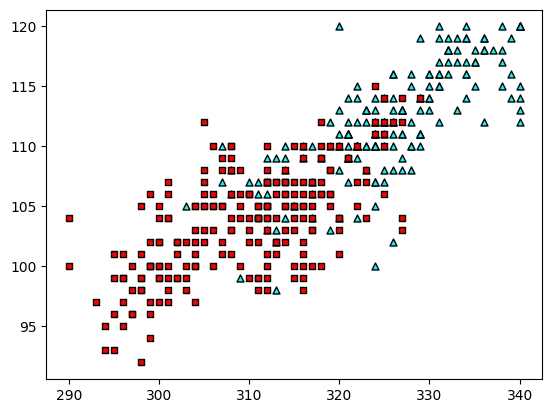

In [21]:
utils.plot_points(exams, labels, size_of_points=25)

### Fitting a tree of depth 2

In [22]:
#dt_exams = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=10)
dt_exams = DecisionTreeClassifier(max_depth=2)

In [23]:
dt_exams.fit(exams, labels)

DecisionTreeClassifier(max_depth=2)

c:\Users\maskf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


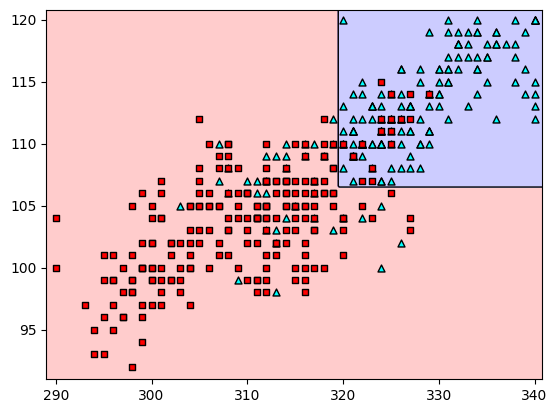

In [24]:
utils.plot_model(exams, labels, dt_exams, size_of_points=25)

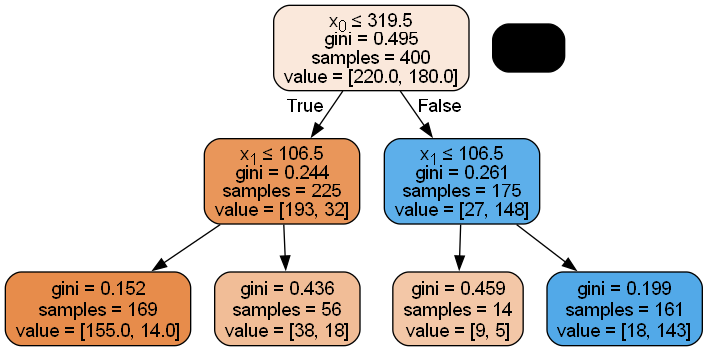

In [25]:
utils.display_tree(dt_exams)

### Fitting a tree of depth 1

In [26]:
simpler_dt_exams = DecisionTreeClassifier(max_depth=1)
simpler_dt_exams.fit(exams, labels)

DecisionTreeClassifier(max_depth=1)

c:\Users\maskf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


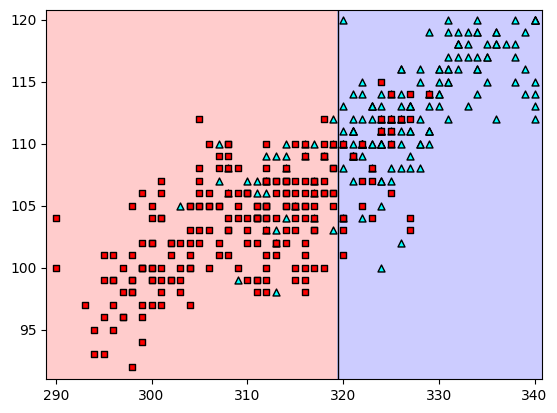

In [27]:
utils.plot_model(exams, labels, simpler_dt_exams, size_of_points=25)

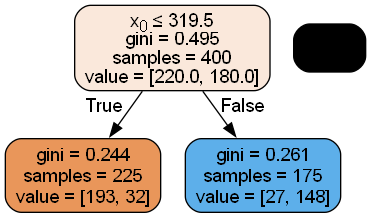

In [28]:
utils.display_tree(simpler_dt_exams)

### Fitting a tree of unbounded depth (overfitting)

In [29]:
crazy_dt_exams = DecisionTreeClassifier()
crazy_dt_exams.fit(exams, labels)

DecisionTreeClassifier()

c:\Users\maskf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


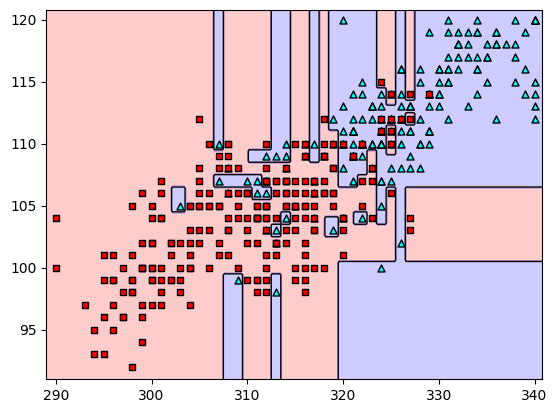

In [30]:
utils.plot_model(exams, labels, crazy_dt_exams, size_of_points=25)

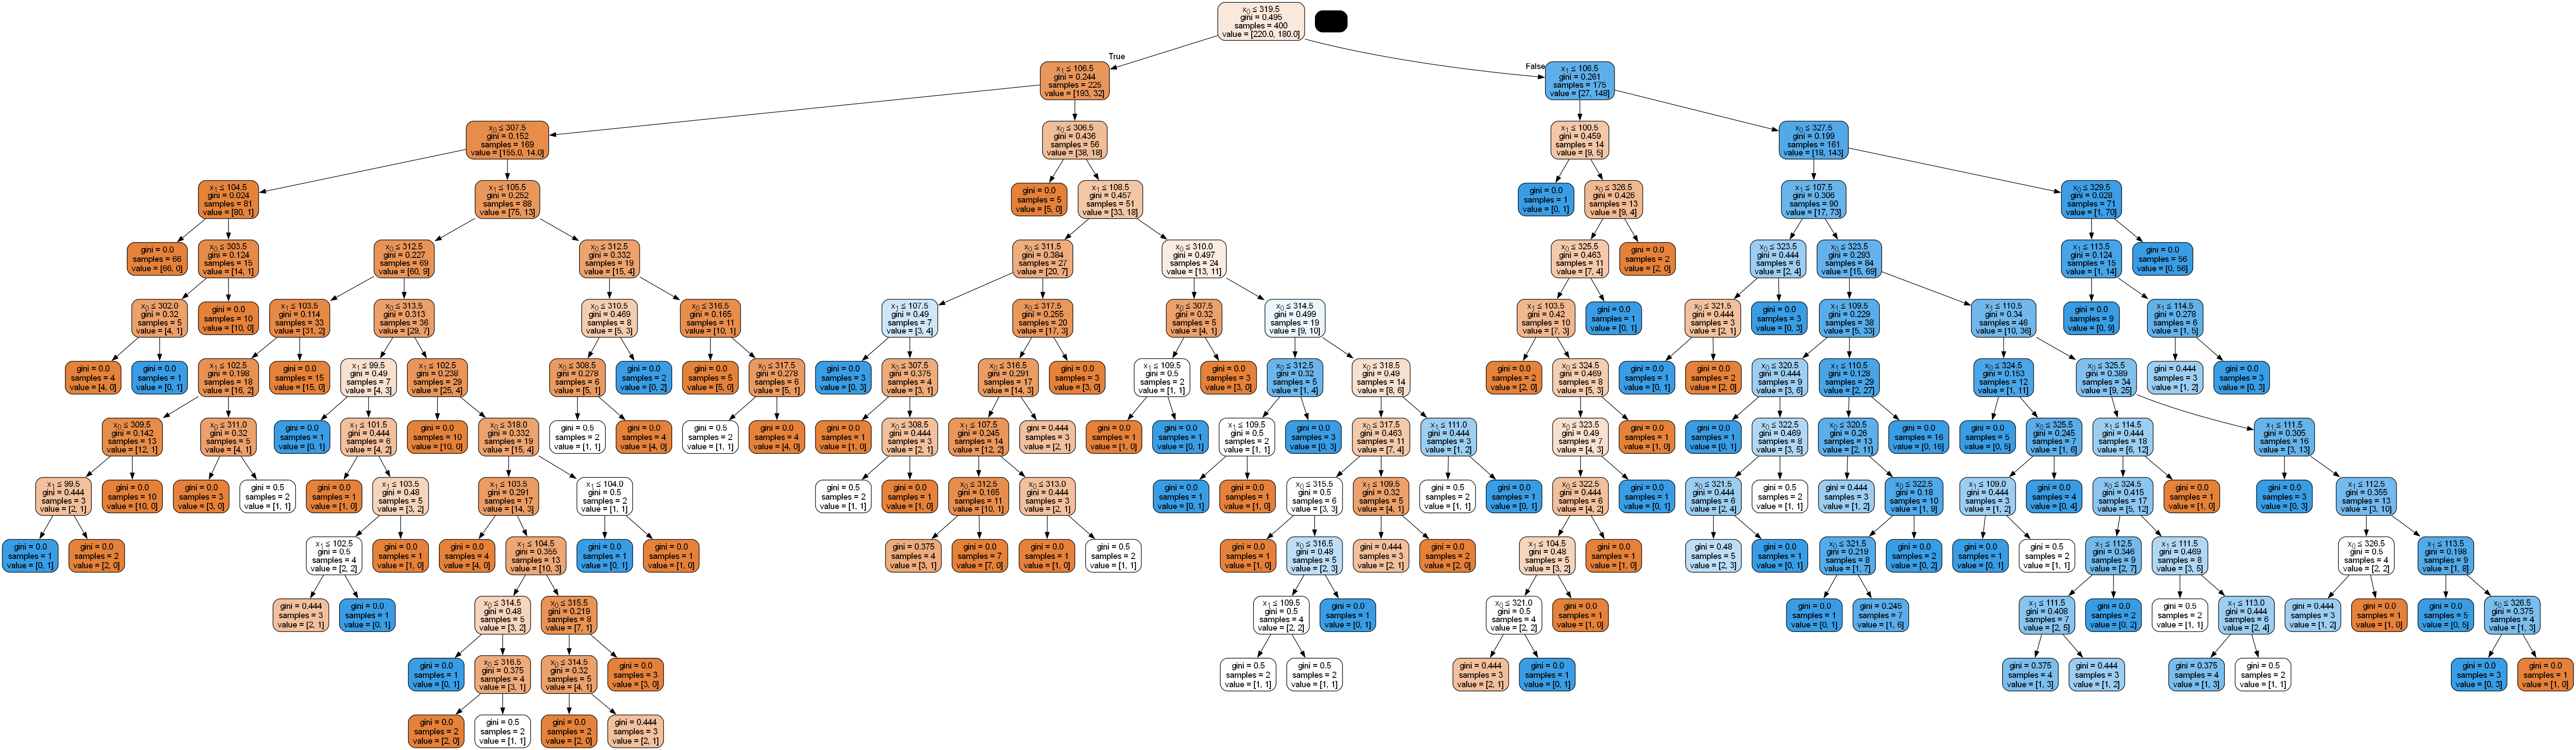

In [31]:
utils.display_tree(crazy_dt_exams)